## Импортируем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

## Загружаем данные


In [2]:
# загружаем датасеты
URL1 = 'https://raw.githubusercontent.com/M1ffka/spam-finding/main/test_spam.csv'
URL2 = 'https://raw.githubusercontent.com/M1ffka/spam-finding/main/train_spam.csv'
DF_train = pd.read_csv(URL2)
DF_test = pd.read_csv(URL1)

In [3]:
# смотрим первые пять строк датафреймов
DF_train.head()

,text_type,text
0,ham,make sure alex knows his birthday is over in f...
1,ham,a resume for john lavorato thanks vince i will...
2,spam,plzz visit my website moviesgodml to get all m...
3,spam,urgent your mobile number has been awarded wit...
4,ham,overview of hr associates analyst project per ...


In [4]:
DF_test.head()

,text
0,j jim whitehead ejw cse ucsc edu writes j you ...
1,original message from bitbitch magnesium net p...
2,java for managers vince durasoft who just taug...
3,there is a youtuber name saiman says
4,underpriced issue with high return on equity t...


## Анализ данных
Так как для обучения будем использовать только тренировочный датасет, то весь анализ данных будем производить по нему


In [5]:
# Узнаём размерность наших данных
DF_train.shape

(16278, 2)

16278 строк: количество текстовых сообщений
2 столбца: первый столбец - тип текста (ham, spam), второй столбец - текстовое сообщение

In [6]:
# Смотрим информацию датасета
DF_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16278 entries, 0 to 16277
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text_type  16278 non-null  object
 1   text       16278 non-null  object
dtypes: object(2)
memory usage: 254.5+ KB


In [7]:
# Проверяем датасет на наличие пропусков
DF_train.isna().sum()

text_type    0
text         0
dtype: int64

Пропуски не обнаружены

In [8]:
# Проверяем датасет на дублирующиеся строки и удаляем их
DF_train.drop_duplicates(inplace = True)

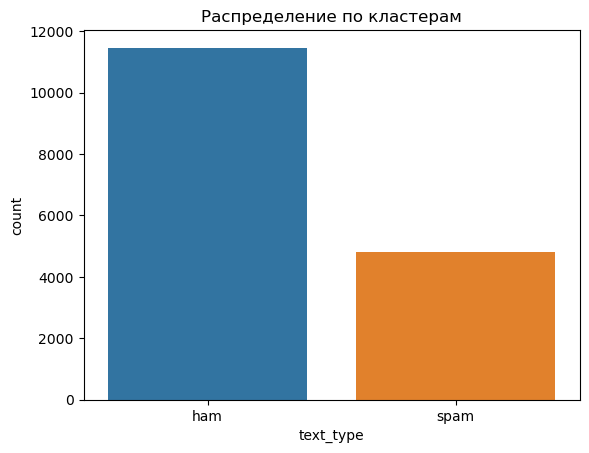

In [9]:
# Визуализируем частоту появления каждого кластера
sns.countplot(x='text_type', data=DF_train)
plt.title('Распределение по кластерам')
plt.show()

## Обучение моделей

Перед нами стоит задача классификации текстовых сообщений.
Для этого будем обучать наши данные по трём моделям: SVC, LogisticRegression, MultinomialNB.

In [10]:
# Модель SVC (Указываем probability = True для того, чтобы рассчитать метрику Roc-Auc)
model_1 = svm.SVC(probability = True)
# Модель MultinomialNB
model_2 = MultinomialNB()
# Модель логистической регрессии
model_3 = LogisticRegression(max_iter=1000)

In [11]:
# Разобьем нашу обучающую выборку на тренировочную и тестовую, для отслеживания метрики ROC-AUC
X = DF_train['text']
y = DF_train['text_type']
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [12]:
# Преобразуем наш текст в матрицу с помощью CountVectorizer
cv = CountVectorizer()
features = cv.fit_transform(X_train)

In [13]:
# Запустим обучение модели методом опорных векторов
model_1.fit(features, y_train)

SVC(probability=True)

In [14]:
# Преобразуем тестовые значения в матрицу с помощью CountVectorizer
features_test = cv.transform(X_test)
# Получаем вероятности
probs_1 = model_1.predict_proba(features_test)[:, 1]

In [15]:
# инициализируем ROC-AUC и выводим результат
roc_auc = roc_auc_score(y_test, probs_1)
print("ROC-AUC: {}".format(roc_auc))

ROC-AUC: 0.9775887672026153


In [16]:
# Запустим обучение модели наивным методом Байеса
model_2.fit(features, y_train)

MultinomialNB()

In [17]:
# Получаем вероятности
probs_2 = model_2.predict_proba(features_test)[:, 1]

In [18]:
# инициализируем ROC-AUC и выводим результат
roc_auc = roc_auc_score(y_test, probs_2)
print("ROC-AUC: {}".format(roc_auc))

ROC-AUC: 0.9664707241271823


In [19]:
# Запустим обучение модели с помощью логистической регрессии
model_3.fit(features, y_train)

LogisticRegression(max_iter=1000)

In [20]:
# Получаем вероятности
probs_3 = model_3.predict_proba(features_test)[:, 1]

In [21]:
# инициализируем ROC-AUC и выводим результат
roc_auc = roc_auc_score(y_test, probs_3)
print("ROC-AUC: {}".format(roc_auc))

ROC-AUC: 0.9802290474727227


Вывод: Наилучшей моделью является model_3 - Логистической регрессии, так как она имеет наилучший ROC-AUC скор.

## Скоринг лучшей моделью

In [22]:
# Преобразуем наш текст в матрицу с помощью CountVectorizer
features_1 = cv.transform(DF_test['text'])

In [23]:
# Находим предсказанные значения
predictions = model_3.predict(features_1)

In [30]:
# создаем наш итоговый датафрейм
results_df = pd.DataFrame({
    "score": predictions,
    "text": DF_test['text'].reset_index(drop=True)
})

In [35]:
# Смотрим итоговый датафрейм
results_df

,score,text
0,ham,j jim whitehead ejw cse ucsc edu writes j you ...
1,ham,original message from bitbitch magnesium net p...
2,ham,java for managers vince durasoft who just taug...
3,ham,there is a youtuber name saiman says
4,spam,underpriced issue with high return on equity t...
...,...,...
4065,ham,husband to wifetum meri zindagi hoorwifeor kya...
4066,ham,baylor enron case study cindy yes i shall co a...
4067,ham,boring as compared to tp
4068,ham,hellogorgeous hows u my fone was on charge lst...


In [37]:
# скачиваем датафрейм
results_df.to_csv("results_df.csv", index=False)